<a href="https://colab.research.google.com/github/VellummyilumVinoth/Image_processing_using_Python/blob/main/Image_processing_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize the Data

Populating the interactive namespace from numpy and matplotlib


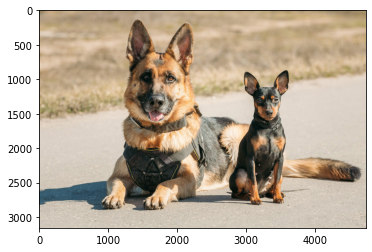

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/Dogs and Cats Datasets/test/dogs/dog_380.jpg')
imgplot = plt.imshow(img)
plt.show()

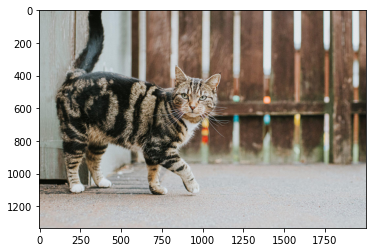

In [6]:
img = mpimg.imread('/content/drive/MyDrive/Dogs and Cats Datasets/test/cats/cat_10.jpg')
imgplot = plt.imshow(img)
plt.show()

# Import Libraries


In [7]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image

### Check the Tensorflow version

In [12]:
print(tensorflow.__version__)

2.11.0


# Designing the Model

### Initialize the parameters